# XGBoost Classifier

In [15]:
import pandas as pd
import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

df=pd.read_csv('indian_liver_patient_preprocessed.csv')
X=df.iloc[:,:-2]
y=df.iloc[:,-1]

print(df.shape)


# Create the training and test sets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123)

# Fit the classifier to the training set
xg_cl.fit(X_train,y_train)

# Predict the labels of the test set: preds
preds = xg_cl.predict(X_test)

# Compute the accuracy: accuracy
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

(579, 12)
accuracy: 0.758621


# XGBoost with CrossValidation

In [16]:
# Create the DMatrix from X and y: churn_dmatrix
churn_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:logistic", "max_depth":3}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=churn_dmatrix, params=params, 
                  nfold=3, num_boost_round=5, 
                  metrics="error", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Print the accuracy
print(((1-cv_results["test-error-mean"]).iloc[-1]))


# Perform cross_validation: cv_results
cv_results = xgb.cv(dtrain=churn_dmatrix, params=params, 
                  nfold=3, num_boost_round=5, 
                  metrics="auc", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Print the AUC
print((cv_results["test-auc-mean"]).iloc[-1])


   train-error-mean  train-error-std  test-error-mean  test-error-std
0          0.248705         0.009220         0.345423        0.034456
1          0.244387         0.012924         0.317789        0.042587
2          0.229707         0.008806         0.314335        0.025849
3          0.221071         0.006800         0.305700        0.023555
4          0.213299         0.014084         0.317789        0.017613
0.6822106666666667
   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.773403       0.018866       0.631255      0.015283
1        0.801817       0.013810       0.673916      0.026464
2        0.831968       0.006772       0.693774      0.016308
3        0.847526       0.002201       0.706911      0.026000
4        0.859751       0.007442       0.709097      0.021602
0.7090966666666666


C:\Users\kyada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\kyada\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


# Visualize XGBoost Tree

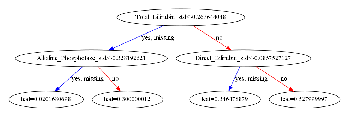

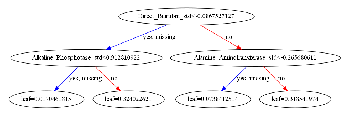

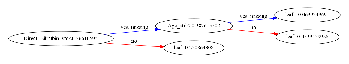

In [17]:
from graphviz import Digraph
import matplotlib.pyplot as plt

# Create the parameter dictionary: params
params = {"objective":"reg:logistic", "max_depth":2}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=churn_dmatrix, num_boost_round=10)

# Plot the first tree
xgb.plot_tree(xg_reg,num_trees=0)
plt.show()

# Plot the fifth tree
xgb.plot_tree(xg_reg,num_trees=4)
plt.show()

# Plot the last tree sideways
xgb.plot_tree(xg_reg,num_trees=9,rankdir="LR")
plt.show()

# Plot Importance of Features

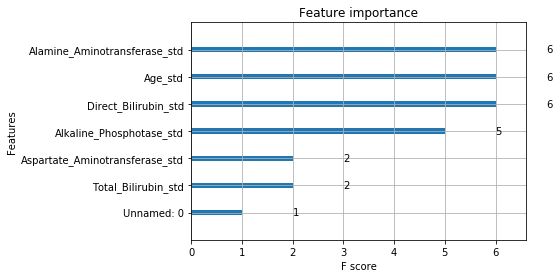

In [19]:
# Plot the feature importances
xgb.plot_importance(xg_reg)
plt.show()

# Regularize L1,l2 and lambda

In [18]:
reg_params = [1, 10, 100]

# Create the initial parameter dictionary for varying l2 strength: params
params = {"objective":"reg:logistic","max_depth":3}

# Create an empty list for storing rmses as a function of l2 complexity
rmses_l2 = []

# Iterate over reg_params
for reg in reg_params:

    # Update l2 strength
    params["lambda"] = reg
    
    # Pass this updated param dictionary into cv
    cv_results_rmse = xgb.cv(dtrain=churn_dmatrix, params=params, nfold=2, num_boost_round=5, metrics="auc", as_pandas=True, seed=123)
    
    # Append best rmse (final round) to rmses_l2
    rmses_l2.append(cv_results_rmse["test-auc-mean"].tail(1).values[0])

# Look at best rmse per l2 param
print("Best auc as a function of l2:")
print(pd.DataFrame(list(zip(reg_params, rmses_l2)), columns=["l2", "auc"]))

Best auc as a function of l2:
    l2       auc
0    1  0.675895
1   10  0.690705
2  100  0.590401
